✅ Dataset dummy 'heart.csv' berhasil dibuat.

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       20 non-null     int64  
 1   sex       20 non-null     int64  
 2   cp        20 non-null     int64  
 3   trestbps  20 non-null     int64  
 4   chol      20 non-null     int64  
 5   fbs       20 non-null     int64  
 6   restecg   20 non-null     int64  
 7   thalach   20 non-null     int64  
 8   exang     20 non-null     int64  
 9   oldpeak   20 non-null     float64
 10  slope     20 non-null     int64  
 11  ca        20 non-null     int64  
 12  thal      20 non-null     int64  
 13  target    20 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 2.3 KB
None 

Statistik Deskriptif:
             age        sex         cp    trestbps        chol        fbs  \
count  20.000000  20.000000  20.000000   20.000000 

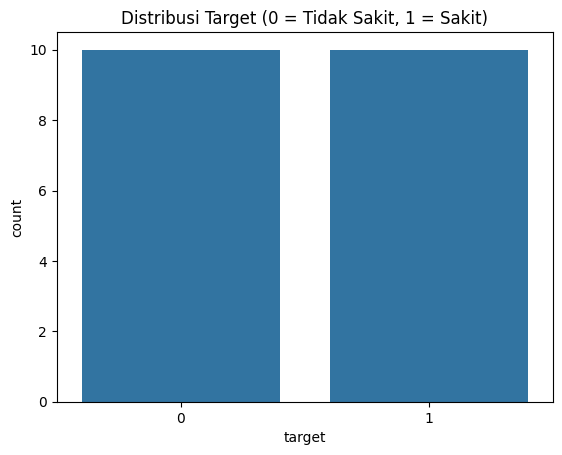


🔍 Model: Logistic Regression
Akurasi: 0.25
Confusion Matrix:
[[1 1]
 [2 0]]


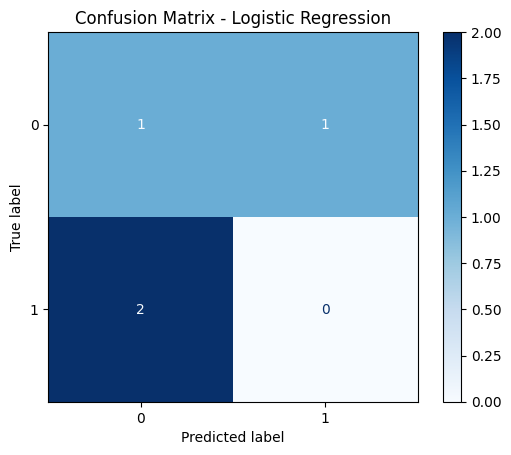


🔍 Model: Decision Tree
Akurasi: 0.25
Confusion Matrix:
[[1 1]
 [2 0]]


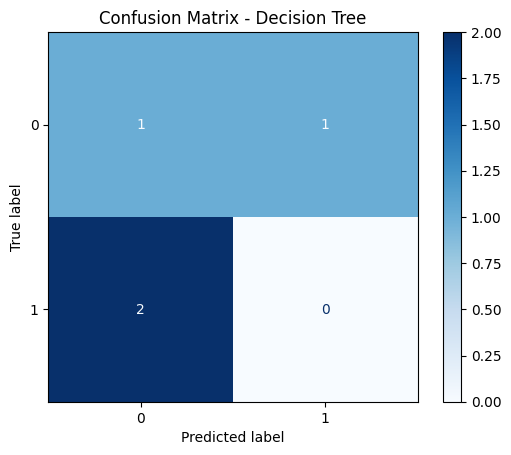


🔍 Model: KNN
Akurasi: 0.50
Confusion Matrix:
[[1 1]
 [1 1]]


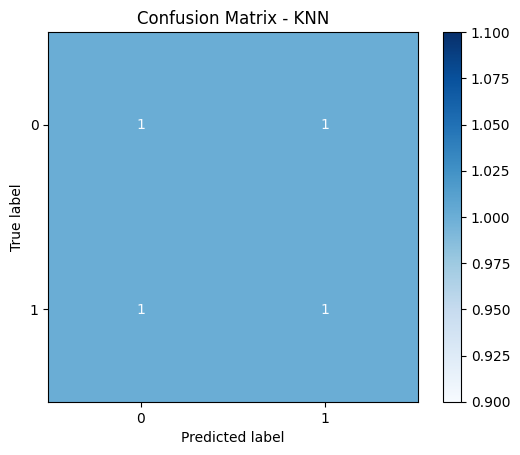

In [3]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 2. Dataset Dummy (berisi target 0 dan 1)
data = {
    'age':      [63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 50, 60, 45, 39, 54, 48, 59, 62, 47, 51],
    'sex':      [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
    'cp':       [3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 2, 1],
    'trestbps': [145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 130, 110, 120, 135, 140, 125, 120, 110, 118, 132],
    'chol':     [233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 250, 230, 240, 245, 210, 220, 200, 190, 275, 260],
    'fbs':      [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    'restecg':  [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
    'thalach':  [150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 170, 165, 175, 155, 158, 168, 172, 169, 161],
    'exang':    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    'oldpeak':  [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.0, 1.2, 0.8, 0.5, 1.3, 0.6, 1.0, 1.5, 1.4, 1.1],
    'slope':    [0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1],
    'ca':       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'thal':     [1, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 3, 1, 3, 2, 2, 2, 1, 3, 2],
    'target':   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,   0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}
df = pd.DataFrame(data)
df.to_csv('heart.csv', index=False)
print("✅ Dataset dummy 'heart.csv' berhasil dibuat.\n")

# 3. Membaca dan eksplorasi awal
df = pd.read_csv('heart.csv')
print("Informasi Dataset:")
print(df.info(), "\n")
print("Statistik Deskriptif:")
print(df.describe(), "\n")
print("Contoh Data:")
print(df.head(), "\n")

# 4. Visualisasi Distribusi Target
sns.countplot(x='target', data=df)
plt.title('Distribusi Target (0 = Tidak Sakit, 1 = Sakit)')
plt.show()

# 5. Persiapan Data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Inisialisasi Model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

# 7. Pelatihan, Evaluasi, dan Visualisasi
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n🔍 Model: {name}")
    print(f"Akurasi: {acc:.2f}")
    print("Confusion Matrix:")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
